In [1]:
# %load_ext rpy2.ipython
%matplotlib inline
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [11]:
df = pd.read_csv("/home/pengli/Downloads/prophet-master/examples/example_wp_peyton_manning.csv")
print (type(df))
print (df.dtypes)
df["y"] = np.log(df["y"])
df.head()

<class 'pandas.core.frame.DataFrame'>
ds    object
y      int64
dtype: object


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [12]:
m = Prophet()
m.fit(df)
# 
# print("predict")
# 预测，将结果放入forecast数据框
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
print (forecast.columns)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.204286,7.464142,8.944670
3266,2017-01-16,8.529291,7.856750,9.318337
3267,2017-01-17,8.316700,7.624848,9.076730
3268,2017-01-18,8.149302,7.425752,8.916493
3269,2017-01-19,8.161222,7.474526,8.928650


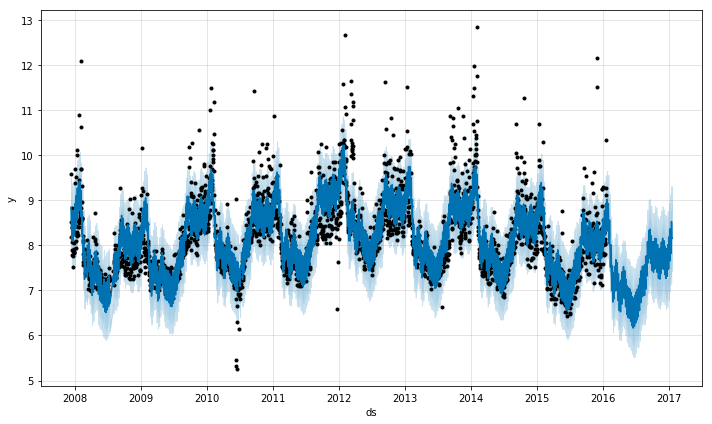

In [13]:
# m.plot(forecast)
m.plot(forecast).show()

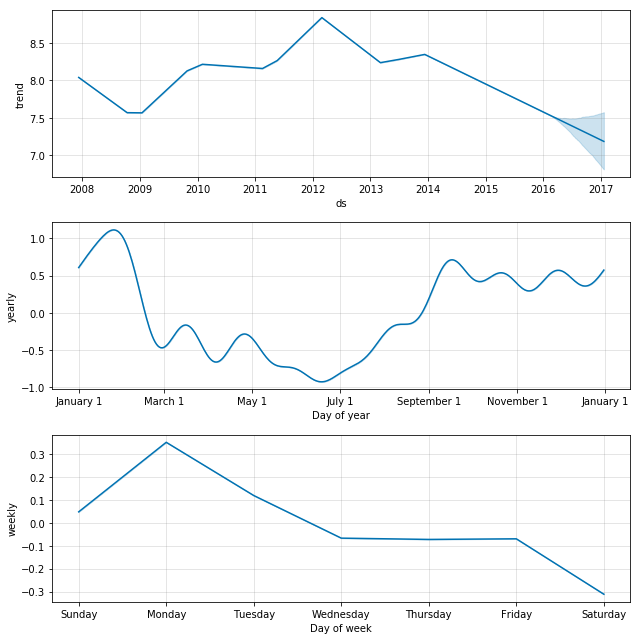

In [14]:
m.plot_components(forecast).show()